In [235]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
# from fredapi import Fred
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()

In [323]:
df_total = pd.read_csv('./new_data/complete_file.csv', encoding='cp949')
df_my = df_total[['year','quater','non-OPEC Production change', 'y-o-y % OECD Consumption Change',
       'Spare Capacity','WTI Real Price (GDP Deflated)']]
df_my.sort_values(['year', 'quater'], inplace=True)
df_my = df_my[df_my['WTI Real Price (GDP Deflated)'].isna()==False]
df_my.columns = ['year','quater','non_opec_produce_change','oecd_consumption_change','spare_capacity','wti_real']

C:\Users\kbh11\AppData\Local\Temp\ipykernel_5408\887332878.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_my.sort_values(['year', 'quater'], inplace=True)


In [324]:
df_my['wti_pct'] = df_my['wti_real'].pct_change()
df_my['wti_pct'][0] = 0
df_my['year'] = df_my['year'].apply(lambda x: str(x))
df_my['idx'] = df_my['year'] + '-' + df_my['quater']

C:\Users\kbh11\AppData\Local\Temp\ipykernel_5408\6327109.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_my['wti_pct'][0] = 0
C:\Users\kbh11\AppData\Local\Temp\ipykernel_5408\6327109.py:2: SettingWithCopyWarning: 
A value is trying to

<Axes: >

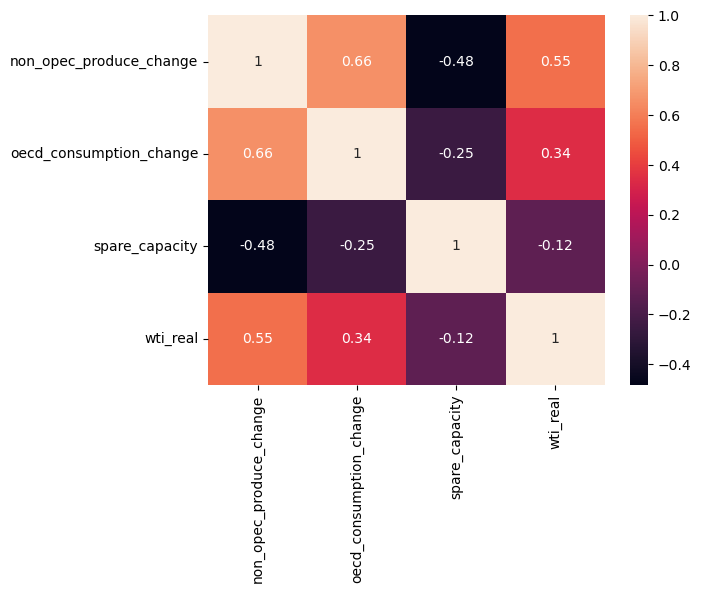

In [325]:
df_my_corr = df_my.iloc[48:,2:-2]
df_my_corr = df_my_corr.corr(method='pearson')
sns.heatmap(df_my_corr, annot=True, )

In [326]:
wti_scaler = MinMaxScaler()
wti_scaler.fit(df_my[['wti_real']])

non_opec_scaler = MinMaxScaler()
non_opec_scaler.fit(df_my[['non_opec_produce_change']])

MinMaxScaler()

In [327]:
df_my['wti_real_scaled'] = wti_scaler.transform(df_my[['wti_real']])

In [328]:
df_my['non_opec_produce_change_scaled'] = non_opec_scaler.transform(df_my[['non_opec_produce_change']])

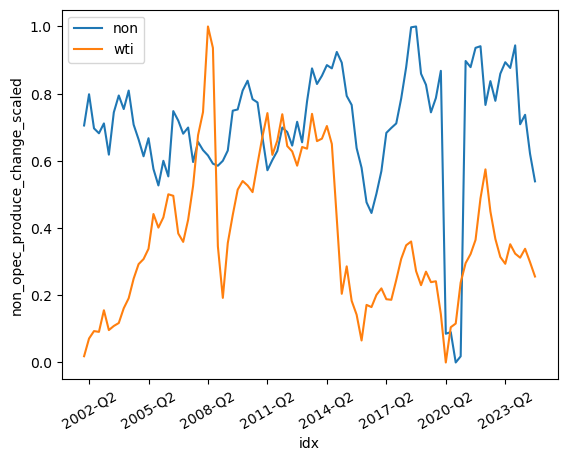

In [329]:
sns.lineplot(df_my, x='idx', y='non_opec_produce_change_scaled', label='non')
sns.lineplot(df_my, x='idx', y='wti_real_scaled', label = 'wti')
plt.xticks(ticks=range(1,90,12), rotation=30)
plt.legend()

In [330]:
df_test = df_total[['Assets under management (four largest public U.S. commodity funds)','Dow Jones UBS Commodity Index']]
df_test.dropna(inplace=True)
df_test['Assets under management (four largest public U.S. commodity funds)'].corr(df_test['Dow Jones UBS Commodity Index'])

C:\Users\kbh11\AppData\Local\Temp\ipykernel_5408\1218471415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(inplace=True)


0.8062784357164268

In [331]:
df_total['asset-price'] = df_total['Assets under management (four largest public U.S. commodity funds)'] - df_total['Dow Jones UBS Commodity Index']

<Axes: >

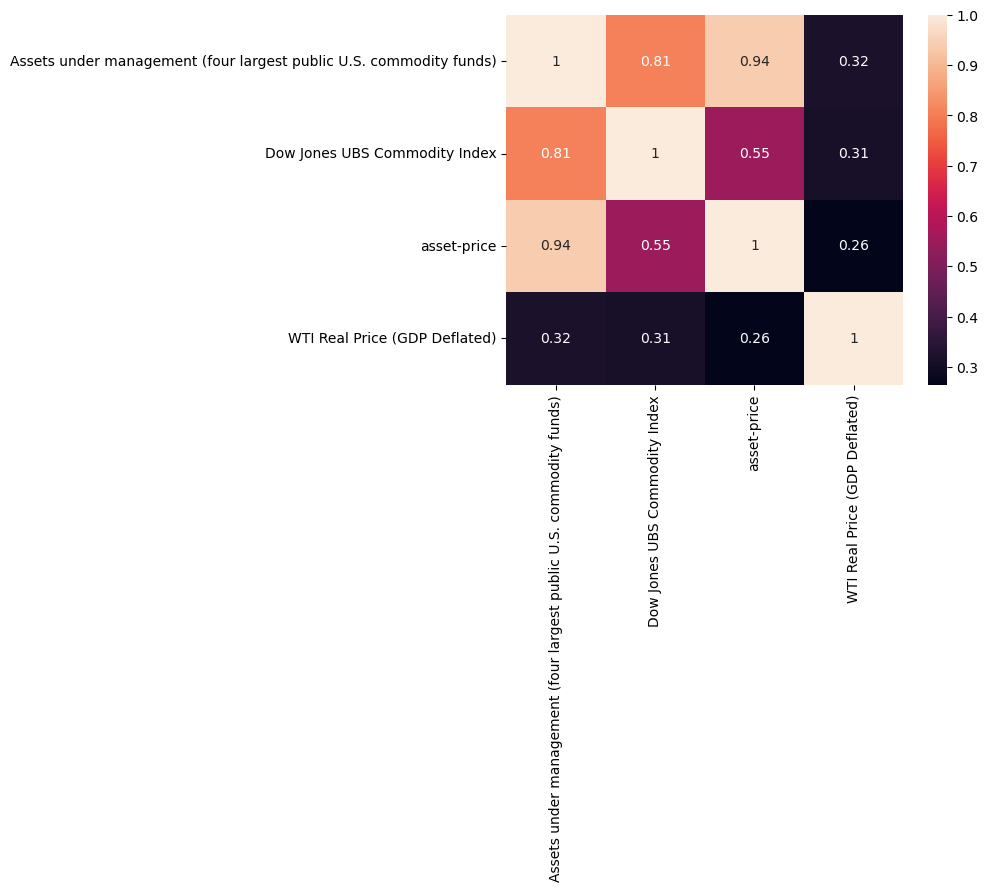

In [248]:
df_test = df_total.dropna()
df_test = df_test[['Assets under management (four largest public U.S. commodity funds)', 'Dow Jones UBS Commodity Index', 'asset-price', 'WTI Real Price (GDP Deflated)']]
df_test_corr = df_test.corr(method='pearson')
sns.heatmap(df_test_corr, annot=True)

In [332]:
df_total['interest_pct'] = df_total['Open Interest'].pct_change()
df_total['interest_pct'][0] = 0
df_total['wti_pct'] = df_total['WTI Real Price (GDP Deflated)'].pct_change()
df_total['wti_pct'][0] = 0

C:\Users\kbh11\AppData\Local\Temp\ipykernel_5408\1726681089.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_total['interest_pct'][0] = 0
C:\Users\kbh11\AppData\Local\Temp\ipykernel_5408\1726681089.py:2: SettingWithCopyWarning: 
A valu

In [333]:
df_test = df_total.dropna()
df_test = df_test.iloc[:,3:]
df_test_corr = df_test.corr(method='pearson')

<Axes: >

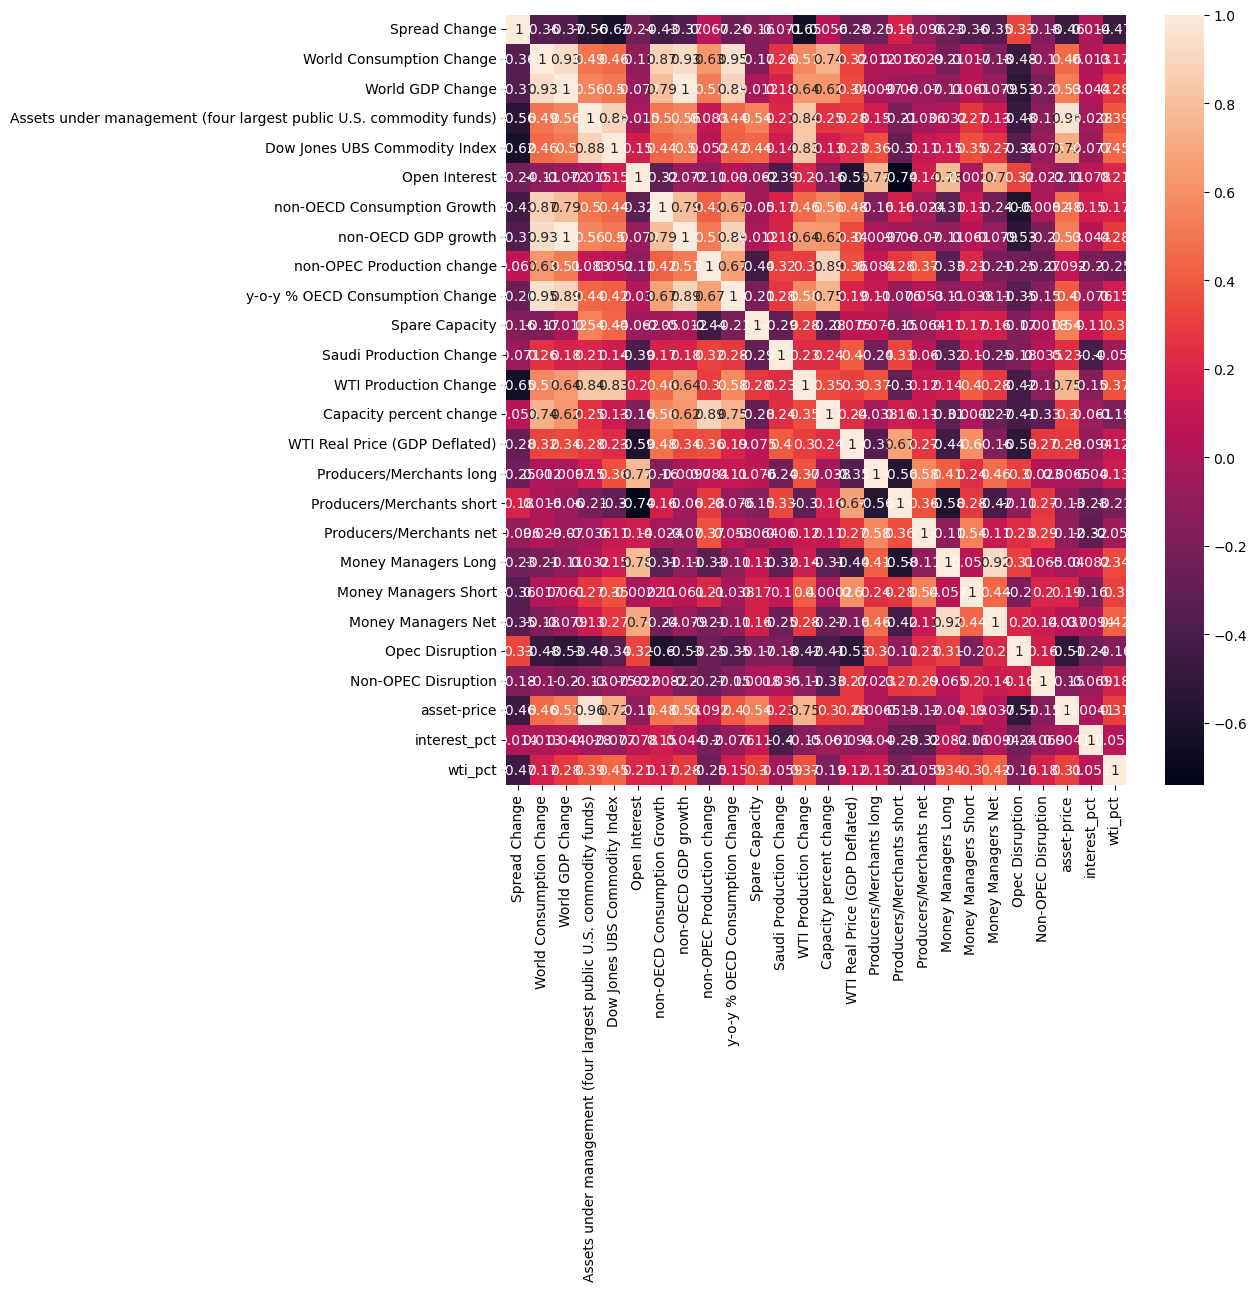

In [336]:
plt.figure(figsize=(10,10))
sns.heatmap(df_test_corr, annot=True)

<Axes: >

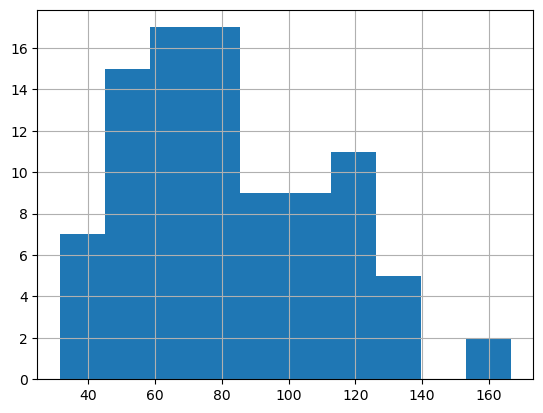

In [378]:
df_total['WTI Real Price (GDP Deflated)'].hist()

In [392]:
df_wti = df_total[['WTI Real Price (GDP Deflated)']].iloc[:]
# df_wti = df_wti['WTI Real Price (GDP Deflated)'].apply(np.log)
df_wti['WTI Real Price (GDP Deflated)'] = np.log(df_wti['WTI Real Price (GDP Deflated)'])
# df_wti

Shapiro-Wilk Test: Statistics=0.985, p=0.401


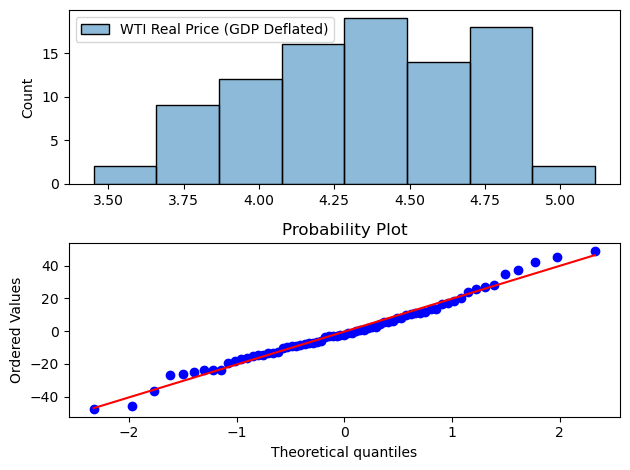

In [395]:
fig, (ax, ay) = plt.subplots(nrows=2 , ncols=1)
stat, p = stats.shapiro(df_wti)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
sns.histplot(df_wti, ax=ax)
stats.probplot(data.iloc[:,0], plot=plt)
plt.tight_layout()
plt.show()

In [397]:
from scipy import stats
import math

def get_qq_hist(df, attribute, log):
    if log:
        data = (pd.DataFrame(mm_scaler.fit_transform(df_total[[attribute]].dropna())))
        data = data.apply(lambda x: (x+1))
        data = data.apply(np.log)        
    else:

        data = (df[[attribute]].dropna())

    fig, (ax, ay) = plt.subplots(nrows=2 , ncols=1)
    stat, p = stats.shapiro(data)
    print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
    sns.histplot(data, ax=ax)
    stats.probplot(data.iloc[:,0], plot=plt)
    plt.tight_layout()
    plt.show()

In [398]:
df_total.iloc[:5,10:]

,non-OECD GDP growth,non-OPEC Production change,y-o-y % OECD Consumption Change,Spare Capacity,Saudi Production Change,WTI Production Change,Capacity percent change,WTI Real Price (GDP Deflated),Producers/Merchants long,Producers/Merchants short,Producers/Merchants net,Money Managers Long,Money Managers Short,Money Managers Net,Opec Disruption,Non-OPEC Disruption,asset-price,interest_pct,wti_pct
0,1.94,0.99,-1.33,7.03,-1.17,-24.76,1.07,34.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,2.49,1.75,-0.35,7.61,-0.53,-5.93,2.03,41.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057800,0.209043
2,3.11,0.92,0.23,6.75,-0.27,5.97,0.98,44.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.044202,0.072365
3,3.34,0.80,1.91,5.35,0.37,38.09,0.00,43.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108260,-0.006793
4,3.24,1.04,2.53,2.04,1.62,57.30,-3.22,52.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158739,0.197902


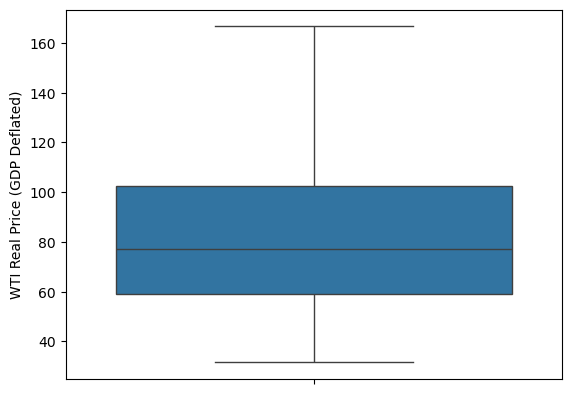

Shapiro-Wilk Test: Statistics=0.979, p=0.139


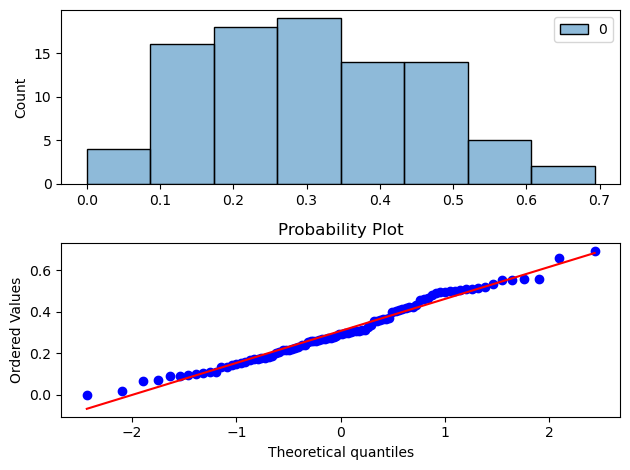

,quater,year,WTI Real Price (GDP Deflated)


In [399]:
att = 'WTI Real Price (GDP Deflated)'
log = True

sns.boxplot(df_total[att])
plt.show()
Q1 = df_total[att].quantile(0.25)
Q3 = df_total[att].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_total[(df_total[att] < lower_bound) | (df_total[att] > upper_bound)]
out_index = outliers.index
df_total_out = df_total[~df_total.index.isin(out_index)]
get_qq_hist(df_total_out, att, log)
outliers[['quater','year', att]]

In [348]:
df_total['Producers/Merchants long'].corr(df_total['Producers/Merchants short'])

-0.5574995325583958

In [317]:
df_total_out[df_total_out['non-OECD GDP growth'] > 5][['quater','year','non-OECD GDP growth']]

,quater,year,non-OECD GDP growth
8,1Q,2004,5.07
9,2Q,2004,5.47
10,3Q,2004,5.13
16,1Q,2006,5.29
17,2Q,2006,5.24
18,3Q,2006,5.10
19,4Q,2006,5.31
20,1Q,2007,5.20
21,2Q,2007,5.39
22,3Q,2007,5.33
